# Importing dependencies

In [107]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate
from arch import arch_model
from arch.__future__ import reindexing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
import arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
from arch.univariate import GARCH
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Acquiring TSLA stock df

In [108]:
df = pd.read_csv("TSLA_2022.csv")

In [109]:
df = pd.read_csv("SP_SC.csv")

In [110]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output
241,2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,139032200,2022-12-16,1.671142e+09,0.038096
242,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,2022-12-19,1.671405e+09,-0.244484
243,2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,2022-12-20,1.671507e+09,-0.118759
244,2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,2022-12-21,1.671577e+09,-0.222528
245,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,2022-12-22,1.671663e+09,-0.114804
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799
250,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300,2022-12-30,1.672353e+09,-0.103723


# Calculating and plotting the daily returns

In [111]:
df['Return'] = 100 * (df['Adj Close'].pct_change())

In [112]:
#Dropping the first row since its NaN
df = df.drop(index=0) 


In [113]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output,Return
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,2022-01-04,1.641242e+09,-0.101193,-4.183270
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,2022-01-05,1.641334e+09,-0.218186,-5.347121
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,2022-01-06,1.641426e+09,-0.204311,-2.152337
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,2022-01-07,1.641517e+09,-0.248822,-3.544657
5,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000,2022-01-10,1.641773e+09,-0.058042,3.034195
...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171,-1.755083
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060,-11.408854
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069,3.308892
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799,8.082691


Text(0.5, 1.0, 'Daily Returns Over Time')

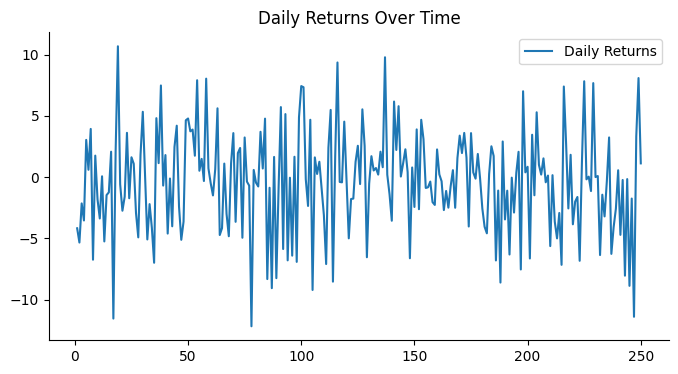

In [114]:
df.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

# Calculating daily, monthly and annual volatility

In [115]:

daily_volatility = df['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

print(tabulate([['Tesla',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

╒═══════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│       │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═══════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ Tesla │         4.12         │         18.86          │         65.33         │
╘═══════╧══════════════════════╧════════════════════════╧═══════════════════════╛


# Statistical Test | PART I.

#### Augmented Dickey-Fuller Test (ADF) / Test for stationarity

In [116]:
# Testing for stationarity in the df ('Returns' column)
# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time
# H1: The time series is stationary

adfuller(df["Return"])

# Test statistic: -4.10658
# p-value: 0.00094
# Conlclusion: p-value < 0, so H0 is rejected. The returns are stationary

(-4.106586702076152,
 0.0009445273454100348,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 1318.264829870127)

#### [CHECK AGAIN LATER!!!] / Jarque-Bera Test / Testing if the returns are normally distributed


In [117]:
# Why is it important? To see what distribution is best when fitting the GARCH models
# H0: The df follows a normal distribution
# H1: The df does not follow a normal distribution

# DOES NOT MAKE SENSE - returns not supposed to follow a normal distrubution but the test says so

#perform Jarque-Bera test
stats.jarque_bera(df["Return"])

# Null hypothesis is failed to be rejected
# The df seems to be following a normal distribution

SignificanceResult(statistic=0.9986487015255835, pvalue=0.606940600162593)

# ACF & PACF 

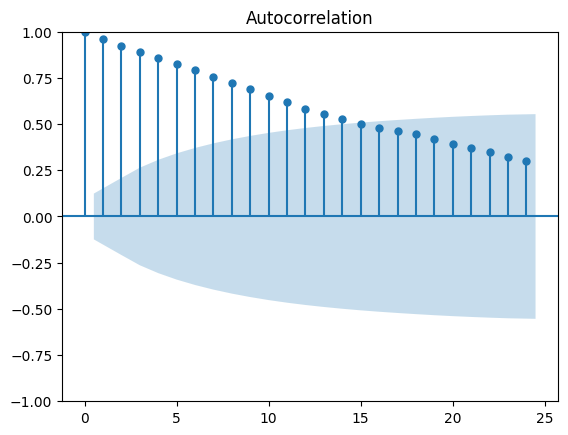

In [118]:
plot_acf(df['Adj Close']**2)
plt.show()

C:\Users\maart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


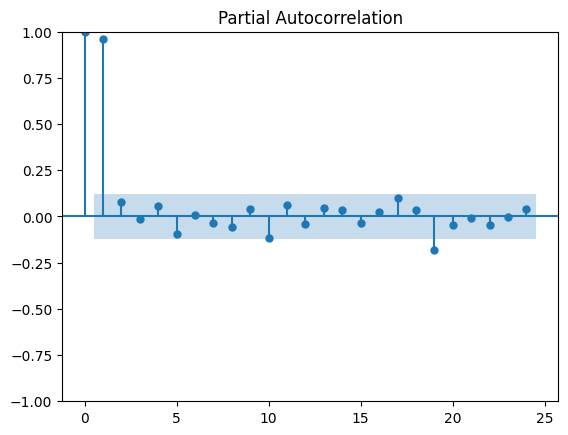

In [119]:
plot_pacf(df['Adj Close']**2)
plt.show()

# Normalizing our x values so that it fits the GJR - GARCH

In [120]:
# df['reg_output'] = (df['reg_output'] - np.min(df['reg_output']) + 1) / (np.max(df['reg_output']) - np.min(df['reg_output']) + 1)

# # min(x_normalized)

In [121]:
df['dummy'] = (df['reg_output'] < 0).astype(int)

In [122]:
df['reg_output_squared'] = df['reg_output']**2


In [123]:
df['Multiplication_dummy'] = df['reg_output_squared'] * df['dummy']

# [Benchmark]GARCH(1,1) with normal distribution

In [173]:
benchmark = arch_model(df['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

benchmark = benchmark.fit(disp='off')
print(benchmark.params)

print('\n')

benchmark_forecast = benchmark.forecast(horizon = 1) # Q:What does horizon mean here?
print(benchmark_forecast.variance[-1:])              # A:The nr of steps ahead FC

mu         -0.364821
omega       0.768792
alpha[1]    0.020109
beta[1]     0.935147
Name: params, dtype: float64


           h.1
250  19.726717


In [174]:
benchmark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -707.531
Distribution:                  Normal   AIC:                           1423.06
Method:            Maximum Likelihood   BIC:                           1437.15
                                        No. Observations:                  250
Date:                Wed, Mar 22 2023   Df Residuals:                      249
Time:                        17:28:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3648      0.266     -1.373      0.170 [ -0.886,  0.156]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.7688      0.490      1.568      0.117      [ -0.192,  1.729]
alpha[1]       0.0201  2.653e-02      0.758      0.449 [-3.190e-02,7.211e-02]
beta[1]        0.9351  2.563e-02     36.486 1.839e-291      [  0.885,  0.985]
=============================================================================

Covariance estimator: robust
"""

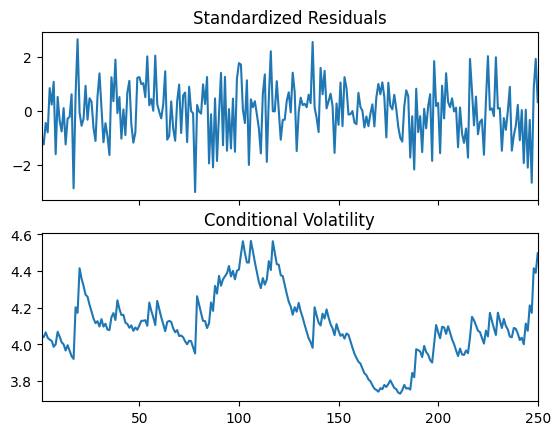

In [175]:
# Plot fitted results of GARCH (1,1)
benchmark.plot()
plt.show()

<Figure size 300x400 with 0 Axes>

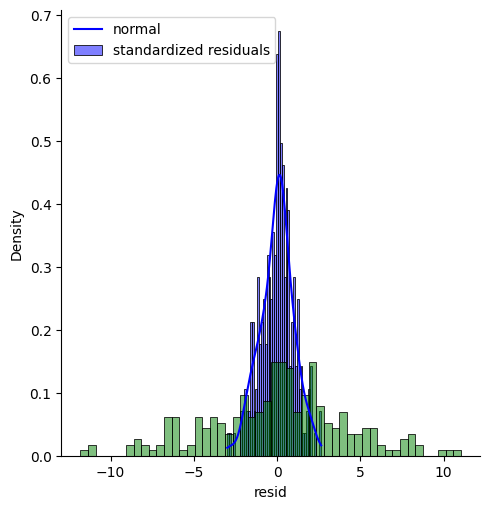

In [177]:
# Obtain model estimated residuals and volatility
benchmark_resid = benchmark.resid
benchmark_std = benchmark.conditional_volatility

# Calculate the standardized residuals
benchmark_std_resid = benchmark_resid / benchmark_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.displot(benchmark_std_resid, kde=True, stat="density", bins=50, color='b')
sns.histplot(benchmark_resid, stat="density", bins=50, color='g', alpha=0.5)
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [128]:
benchmark_cond_vol = benchmark.conditional_volatility

In [129]:

actual_values = df['Return']

benchmark_mse = mean_squared_error(actual_values, benchmark_cond_vol)
benchmark_mae = mean_absolute_error(actual_values, benchmark_cond_vol)
benchmark_rmse = np.sqrt(benchmark_mse)

print(f'Mean Squared Error (MSE): {benchmark_mse:.4f}')
print(f'Mean Absolute Error (MAE): {benchmark_mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {benchmark_rmse:.4f}')


Mean Squared Error (MSE): 36.8781
Mean Absolute Error (MAE): 5.0338
Root Mean Squared Error (RMSE): 6.0727


# GARCH(1,1) with skewed t-distribution

In [130]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

In [131]:
skewt_result.summary()
# AIC and BIC are higher than the GARCH (1,1) fitted with normal distribution

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                            Return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -706.572
Distribution:      Standardized Skew Student's t   AIC:                           1425.14
Method:                       Maximum Likelihood   BIC:                           1446.27
                                                   No. Observations:                  250
Date:                           Wed, Mar 22 2023   Df Residuals:                      249
Time:                                   17:24:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3848      0.267     -1.441      0.150 [ -0.908,  0.139]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.6411      0.465      1.378      0.168      [ -0.271,  1.553]
alpha[1]       0.0276  2.775e-02      0.995      0.320 [-2.677e-02,8.199e-02]
beta[1]        0.9356  2.554e-02     36.634 8.221e-294      [  0.886,  0.986]
                               Distribution                               
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
eta           25.1696     38.910      0.647      0.518 [-51.092,1.014e+02]
lambda        -0.1027  6.573e-02     -1.563      0.118 [ -0.232,2.608e-02]
==========================================================================

Covariance estimator: robust
"""

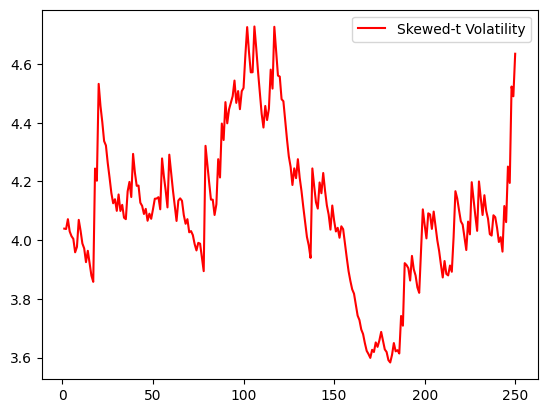

In [132]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.legend(loc = 'upper right')
plt.show()

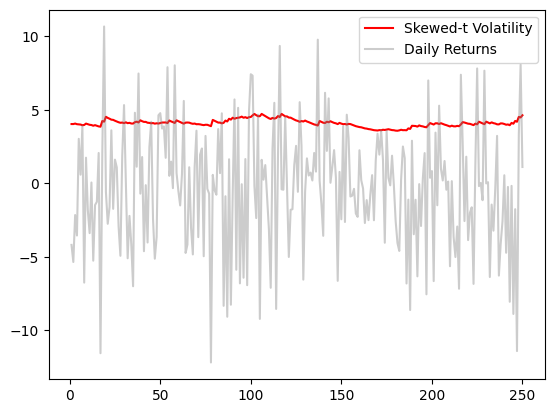

In [133]:
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

# When plotting the model together with the returns, it is clear the model does not perform well / also what the information criteria indicates

# TARCH (1,1)

In [134]:
tarch = arch.arch_model(df['Return'], mean='Constant', vol='GARCH', p=1, q=1, o=1, x=df['reg_output_squared'], power=1.0)


In [135]:
tarch = tarch.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2161.462886885749
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2005.6047981345453
Iteration:      3,   Func. Count:     25,   Neg. LLF: 755.525809233103
Iteration:      4,   Func. Count:     32,   Neg. LLF: 703.8173183730248
Iteration:      5,   Func. Count:     38,   Neg. LLF: 711.7452962302194
Iteration:      6,   Func. Count:     46,   Neg. LLF: 734.1956390089251
Iteration:      7,   Func. Count:     55,   Neg. LLF: 703.7114992248636
Iteration:      8,   Func. Count:     62,   Neg. LLF: 703.0414559678467
Iteration:      9,   Func. Count:     68,   Neg. LLF: 703.0075089578238
Iteration:     10,   Func. Count:     74,   Neg. LLF: 703.0060796005776
Iteration:     11,   Func. Count:     80,   Neg. LLF: 703.0059929648629
Iteration:     12,   Func. Count:     86,   Neg. LLF: 703.0059421767819
Iteration:     13,   Func. Count:     91,   Neg. LLF: 703.0059421772687
Optimization terminated successfully    (Exit mode 0)
          

In [136]:
print(tarch.summary())

                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -703.006
Distribution:                  Normal   AIC:                           1416.01
Method:            Maximum Likelihood   BIC:                           1433.62
                                        No. Observations:                  250
Date:                Wed, Mar 22 2023   Df Residuals:                      249
Time:                        17:24:27   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.4753      0.246     -1.935  5.303e-02 [ -0.957,

In [137]:
tarch.pvalues.round(5)

mu          0.05303
omega       0.36522
alpha[1]    1.00000
gamma[1]    0.01232
beta[1]     0.00000
Name: pvalues, dtype: float64

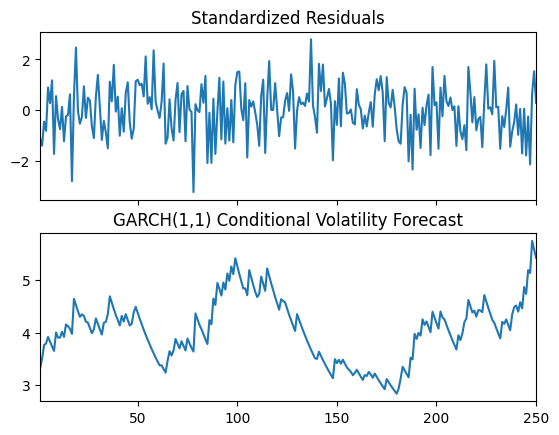

In [138]:
# Plot the conditional volatility forecast
fig = tarch.plot()
plt.title("GARCH(1,1) Conditional Volatility Forecast")
plt.show()

In [139]:
tarch_cond_vol = tarch.conditional_volatility

In [141]:

actual_values = df['Return']

tarch_mse = mean_squared_error(actual_values, tarch_cond_vol)
tarch_mae = mean_absolute_error(actual_values, tarch_cond_vol)
tarch_rmse = np.sqrt(tarch_mse)

print(f'Mean Squared Error (MSE): {tarch_mse:.4f}')
print(f'Mean Absolute Error (MAE): {tarch_mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {tarch_rmse:.4f}')


Mean Squared Error (MSE): 36.4973
Mean Absolute Error (MAE): 4.9563
Root Mean Squared Error (RMSE): 6.0413


# GJR GARCH (1,1)

In [186]:
gjr = arch.arch_model(df['Return'], mean='Constant', vol='GARCH', p=1, q=1, o=1, x=df['reg_output_squared'])


In [187]:
gjr = gjr.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1154.211841440052
Iteration:      2,   Func. Count:     16,   Neg. LLF: 850.456200774974
Iteration:      3,   Func. Count:     25,   Neg. LLF: 769.8594687778763
Iteration:      4,   Func. Count:     34,   Neg. LLF: 705.4575514420092
Iteration:      5,   Func. Count:     41,   Neg. LLF: 703.6609074861316
Iteration:      6,   Func. Count:     47,   Neg. LLF: 703.6602548522474
Iteration:      7,   Func. Count:     53,   Neg. LLF: 703.6602257365782
Iteration:      8,   Func. Count:     58,   Neg. LLF: 703.6602257356232
Optimization terminated successfully    (Exit mode 0)
            Current function value: 703.6602257365782
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 8


In [188]:
print(gjr.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -703.660
Distribution:                  Normal   AIC:                           1417.32
Method:            Maximum Likelihood   BIC:                           1434.93
                                        No. Observations:                  250
Date:                Wed, Mar 22 2023   Df Residuals:                      249
Time:                        17:31:14   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.4254      0.245     -1.739  8.208e-02 [ -0.905,

In [189]:
gjr.pvalues.round(5)

mu          0.08208
omega       0.24266
alpha[1]    1.00000
gamma[1]    0.05292
beta[1]     0.00000
Name: pvalues, dtype: float64

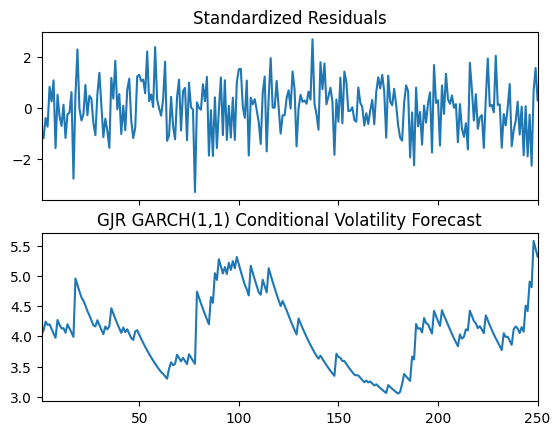

In [190]:
# Plot the conditional volatility forecast
fig = gjr.plot()
plt.title("GJR GARCH(1,1) Conditional Volatility Forecast")
plt.show()

In [191]:
gjr_cond_vol = benchmark.conditional_volatility

In [192]:

actual_values = df['Return']

gjr_mse = mean_squared_error(actual_values, gjr_cond_vol)
gjr_mae = mean_absolute_error(actual_values, gjr_cond_vol)
gjr_rmse = np.sqrt(gjr_mse)

print(f'Mean Squared Error (MSE): {gjr_mse:.4f}')
print(f'Mean Absolute Error (MAE): {gjr_mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {gjr_rmse:.4f}')

Mean Squared Error (MSE): 36.8781
Mean Absolute Error (MAE): 5.0338
Root Mean Squared Error (RMSE): 6.0727


# Table for different evaluation metrics

In [185]:
print(tabulate([['GARCH(1,1)',benchmark_rmse,benchmark_mse, benchmark_mae],['TARCH(1,1)',tarch_rmse,tarch_mse,tarch_mae], ['GJR GARCH(1,1)',gjr_rmse,gjr_mse,gjr_mae]],headers = ['RMSE', 'MSE', 'MAE'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

╒════════════════╤════════╤═══════╤═══════╕
│                │  RMSE  │  MSE  │  MAE  │
╞════════════════╪════════╪═══════╪═══════╡
│   GARCH(1,1)   │  6.07  │ 36.88 │ 5.03  │
├────────────────┼────────┼───────┼───────┤
│   TARCH(1,1)   │  6.04  │ 36.50 │ 4.96  │
├────────────────┼────────┼───────┼───────┤
│ GJR GARCH(1,1) │  6.07  │ 36.88 │ 5.03  │
╘════════════════╧════════╧═══════╧═══════╛


# Comparison Plot

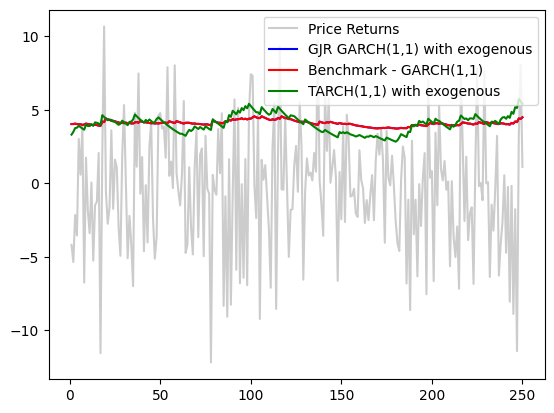

In [150]:
# Plot the actual stock returns
plt.plot(df['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjr_cond_vol, color = 'blue', label = 'GJR GARCH(1,1) with exogenous')

plt.plot(benchmark_cond_vol, color = 'red', label = 'Benchmark - GARCH(1,1)')

plt.plot(tarch_cond_vol, color = 'green', label = 'TARCH(1,1) with exogenous')


plt.legend(loc = 'upper right')
plt.show()

# Minimizing Log-Likelihood

In [151]:
#Model Selection Benchmark GARCH - Lowest Log-Likelihood
import itertools

# Define the range of p, q, and o to search over
p = range(1, 5)
q = range(1, 5)
o = range(1, 5)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared']

# Initialize the log-likelihood and best model variables
best_loglik = -np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        benchmark = arch_model(df['Return'], mean='Constant', vol='GARCH', p=p, q=q, o=o, x=df[exog_vars], power=1.0)

        res = benchmark.fit(disp='off')
        
        # Compute the log-likelihood and update the best model if necessary
        loglik = res.loglikelihood
        if loglik > best_loglik:
            best_loglik = loglik
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), log-likelihood={loglik:.2f}")
    except:
        continue

print("Done!")


# GARCH(1,4,2) has the lowest log-likelihood

Fitting model 1 of 64: (p=1, q=1, o=1)
New best model: (p=1, q=1, o=1), log-likelihood=-703.01
Fitting model 2 of 64: (p=1, q=1, o=2)
New best model: (p=1, q=1, o=2), log-likelihood=-700.49
Fitting model 3 of 64: (p=1, q=1, o=3)
Fitting model 4 of 64: (p=1, q=1, o=4)
New best model: (p=1, q=1, o=4), log-likelihood=-700.49
Fitting model 5 of 64: (p=1, q=2, o=1)
Fitting model 6 of 64: (p=1, q=2, o=2)
New best model: (p=1, q=2, o=2), log-likelihood=-697.52
Fitting model 7 of 64: (p=1, q=2, o=3)
New best model: (p=1, q=2, o=3), log-likelihood=-697.52
Fitting model 8 of 64: (p=1, q=2, o=4)
Fitting model 9 of 64: (p=1, q=3, o=1)
Fitting model 10 of 64: (p=1, q=3, o=2)
New best model: (p=1, q=3, o=2), log-likelihood=-696.49
Fitting model 11 of 64: (p=1, q=3, o=3)
Fitting model 12 of 64: (p=1, q=3, o=4)
New best model: (p=1, q=3, o=4), log-likelihood=-696.40
Fitting model 13 of 64: (p=1, q=4, o=1)
Fitting model 14 of 64: (p=1, q=4, o=2)
New best model: (p=1, q=4, o=2), log-likelihood=-695.99
F

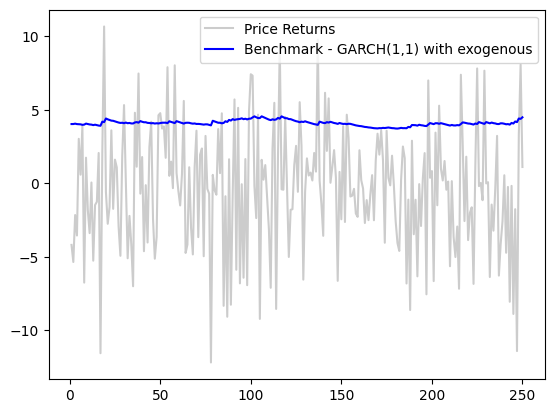

In [152]:
# Plot the actual stock returns
plt.plot(df['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjr_cond_vol, color = 'blue', label = 'Benchmark - GARCH(1,1) with exogenous')

plt.legend(loc = 'upper right')
plt.show()

# [DOES NOT WORK] EGARCH(1,1) with exogenous variable

In [153]:
# Specify the EGARCH model with an exogenous variable
egarch_exo = arch_model(df['Return'], vol='EGARCH', p=1, o=1, q=1, x=df['reg_output_squared'], dist='normal')



#the model gives us pvalues of 0. Probably not correct


In [154]:
egarch_exo =  egarch_exo.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2299.2085977724346
Iteration:      2,   Func. Count:     18,   Neg. LLF: 92493285.78228158
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2289.850485709858
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2293.027759194909
Iteration:      5,   Func. Count:     47,   Neg. LLF: 1027411449.9497074
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1630033026.7101607
Iteration:      7,   Func. Count:     67,   Neg. LLF: 133414569.4557445
Iteration:      8,   Func. Count:     75,   Neg. LLF: 192605262.62382764
Iteration:      9,   Func. Count:     83,   Neg. LLF: 161379208.06964123
Iteration:     10,   Func. Count:     91,   Neg. LLF: 574132355.352977
Iteration:     11,   Func. Count:     99,   Neg. LLF: 183842492.96049184
Optimization terminated successfully    (Exit mode 0)
            Current function value: 697.7564123947569
            Iterations: 11
            Function evaluations: 109
            Gradient evaluatio

In [155]:
print(egarch_exo.summary)

<bound method ARCHModelResult.summary of                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -697.756
Distribution:                  Normal   AIC:                           1405.51
Method:            Maximum Likelihood   BIC:                           1423.12
                                        No. Observations:                  250
Date:                Wed, Mar 22 2023   Df Residuals:                      249
Time:                        17:25:08   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2557  3.483e

In [156]:
egarch_exo.pvalues.round(5)

mu          0.0
omega       0.0
alpha[1]    0.0
gamma[1]    0.0
beta[1]     0.0
Name: pvalues, dtype: float64

# Combined EGARCH (1,1) ARX Model

In [157]:
combined_egarch_arx = arch_model(df['Return'], mean='ARX', lags=1, vol='EGARCH', p=1, q=1, x=df[['reg_output_squared', 'Multiplication_dummy']])

In [158]:
combined_egarch_arx = combined_egarch_arx.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 2288.8417179693383
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1219.310455294351
Iteration:      3,   Func. Count:     31,   Neg. LLF: 698829022.5089463
Iteration:      4,   Func. Count:     41,   Neg. LLF: 978.6989784059451
Iteration:      5,   Func. Count:     52,   Neg. LLF: 703.5117615727497
Iteration:      6,   Func. Count:     60,   Neg. LLF: 705.9318219686418
Iteration:      7,   Func. Count:     69,   Neg. LLF: 703.4858820731845
Iteration:      8,   Func. Count:     77,   Neg. LLF: 703.4820393799171
Iteration:      9,   Func. Count:     85,   Neg. LLF: 703.4785129528827
Iteration:     10,   Func. Count:     93,   Neg. LLF: 703.4820725469027
Iteration:     11,   Func. Count:    102,   Neg. LLF: 703.4928659215881
Iteration:     12,   Func. Count:    113,   Neg. LLF: 703.4754122961149
Iteration:     13,   Func. Count:    121,   Neg. LLF: 703.4751573914525
Iteration:     14,   Func. Count:    129,   Neg. LLF: 703.47517

In [159]:
print(combined_egarch_arx.summary)

<bound method ARCHModelResult.summary of                          AR-X - EGARCH Model Results                          
Dep. Variable:                 Return   R-squared:                       0.009
Mean Model:                      AR-X   Adj. R-squared:                 -0.003
Vol Model:                     EGARCH   Log-Likelihood:               -703.475
Distribution:                  Normal   AIC:                           1420.95
Method:            Maximum Likelihood   BIC:                           1445.57
                                        No. Observations:                  249
Date:                Wed, Mar 22 2023   Df Residuals:                      245
Time:                        17:25:08   Df Model:                            4
                                       Mean Model                                       
                           coef    std err          t      P>|t|        95.0% Conf. Int.
----------------------------------------------------------------------

In [160]:
combined_egarch_arx.pvalues.round(5)

Const                   0.00000
Return[1]               0.00000
reg_output_squared      0.00000
Multiplication_dummy    0.00000
omega                   0.09392
alpha[1]                0.31486
beta[1]                 0.00000
Name: pvalues, dtype: float64

# Model Selection GJR 

In [161]:
#Model Selection GJR - Lowest AIC
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 4)
q = range(1, 4)
o = range(1, 4)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the AIC and best model variables
best_aic = np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the AIC and update the best model if necessary
        aic = res.aic
        if aic < best_aic:
            best_aic = aic
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), AIC={aic:.2f}")
    except:
        continue

print("Done!")

Fitting model 1 of 27: (p=1, q=1, o=1)
New best model: (p=1, q=1, o=1), AIC=1415.52
Fitting model 2 of 27: (p=1, q=1, o=2)
New best model: (p=1, q=1, o=2), AIC=1408.77
Fitting model 3 of 27: (p=1, q=1, o=3)
Fitting model 4 of 27: (p=1, q=2, o=1)
Fitting model 5 of 27: (p=1, q=2, o=2)
Fitting model 6 of 27: (p=1, q=2, o=3)
Fitting model 7 of 27: (p=1, q=3, o=1)
Fitting model 8 of 27: (p=1, q=3, o=2)
New best model: (p=1, q=3, o=2), AIC=1408.38
Fitting model 9 of 27: (p=1, q=3, o=3)
Fitting model 10 of 27: (p=2, q=1, o=1)
Fitting model 11 of 27: (p=2, q=1, o=2)
Fitting model 12 of 27: (p=2, q=1, o=3)
Fitting model 13 of 27: (p=2, q=2, o=1)
Fitting model 14 of 27: (p=2, q=2, o=2)
Fitting model 15 of 27: (p=2, q=2, o=3)
Fitting model 16 of 27: (p=2, q=3, o=1)
Fitting model 17 of 27: (p=2, q=3, o=2)
Fitting model 18 of 27: (p=2, q=3, o=3)
Fitting model 19 of 27: (p=3, q=1, o=1)
Fitting model 20 of 27: (p=3, q=1, o=2)
Fitting model 21 of 27: (p=3, q=1, o=3)
Fitting model 22 of 27: (p=3, q=2,

In [162]:
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 4)
q = range(1, 4)
o = range(1, 4)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the BIC and best model variables
best_BIC = np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the BIC and update the best model if necessary
        bic = res.bic
        if bic < best_bic:
            best_bic = bic
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), BIC={bic:.2f}")
    except:
        continue

print("Done!")

Fitting model 1 of 27: (p=1, q=1, o=1)
Fitting model 2 of 27: (p=1, q=1, o=2)
Fitting model 3 of 27: (p=1, q=1, o=3)
Fitting model 4 of 27: (p=1, q=2, o=1)
Fitting model 5 of 27: (p=1, q=2, o=2)
Fitting model 6 of 27: (p=1, q=2, o=3)
Fitting model 7 of 27: (p=1, q=3, o=1)
Fitting model 8 of 27: (p=1, q=3, o=2)
Fitting model 9 of 27: (p=1, q=3, o=3)
Fitting model 10 of 27: (p=2, q=1, o=1)
Fitting model 11 of 27: (p=2, q=1, o=2)
Fitting model 12 of 27: (p=2, q=1, o=3)
Fitting model 13 of 27: (p=2, q=2, o=1)
Fitting model 14 of 27: (p=2, q=2, o=2)
Fitting model 15 of 27: (p=2, q=2, o=3)
Fitting model 16 of 27: (p=2, q=3, o=1)
Fitting model 17 of 27: (p=2, q=3, o=2)
Fitting model 18 of 27: (p=2, q=3, o=3)
Fitting model 19 of 27: (p=3, q=1, o=1)
Fitting model 20 of 27: (p=3, q=1, o=2)
Fitting model 21 of 27: (p=3, q=1, o=3)
Fitting model 22 of 27: (p=3, q=2, o=1)
Fitting model 23 of 27: (p=3, q=2, o=2)
Fitting model 24 of 27: (p=3, q=2, o=3)
Fitting model 25 of 27: (p=3, q=3, o=1)
Fitting m

In [163]:
#Model Selection GJR - Lowest Log-Likelihood
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 5)
q = range(1, 5)
o = range(1, 5)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the log-likelihood and best model variables
best_loglik = -np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the log-likelihood and update the best model if necessary
        loglik = res.loglikelihood
        if loglik > best_loglik:
            best_loglik = loglik
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), log-likelihood={loglik:.2f}")
    except:
        continue

print("Done!")


Fitting model 1 of 64: (p=1, q=1, o=1)
New best model: (p=1, q=1, o=1), log-likelihood=-699.76
Fitting model 2 of 64: (p=1, q=1, o=2)
New best model: (p=1, q=1, o=2), log-likelihood=-695.38
Fitting model 3 of 64: (p=1, q=1, o=3)
New best model: (p=1, q=1, o=3), log-likelihood=-695.38
Fitting model 4 of 64: (p=1, q=1, o=4)
New best model: (p=1, q=1, o=4), log-likelihood=-694.97
Fitting model 5 of 64: (p=1, q=2, o=1)
Fitting model 6 of 64: (p=1, q=2, o=2)
New best model: (p=1, q=2, o=2), log-likelihood=-694.54
Fitting model 7 of 64: (p=1, q=2, o=3)
Fitting model 8 of 64: (p=1, q=2, o=4)
New best model: (p=1, q=2, o=4), log-likelihood=-694.44
Fitting model 9 of 64: (p=1, q=3, o=1)
Fitting model 10 of 64: (p=1, q=3, o=2)
New best model: (p=1, q=3, o=2), log-likelihood=-693.19
Fitting model 11 of 64: (p=1, q=3, o=3)
New best model: (p=1, q=3, o=3), log-likelihood=-693.19
Fitting model 12 of 64: (p=1, q=3, o=4)
Fitting model 13 of 64: (p=1, q=4, o=1)
Fitting model 14 of 64: (p=1, q=4, o=2)
N

# [NOT USED] Rolling Predictions


In [164]:
# training df size = 200 (80%)
# test df size = 50 (20%)

Text(0.5, 1.0, 'Rolling Prediction')

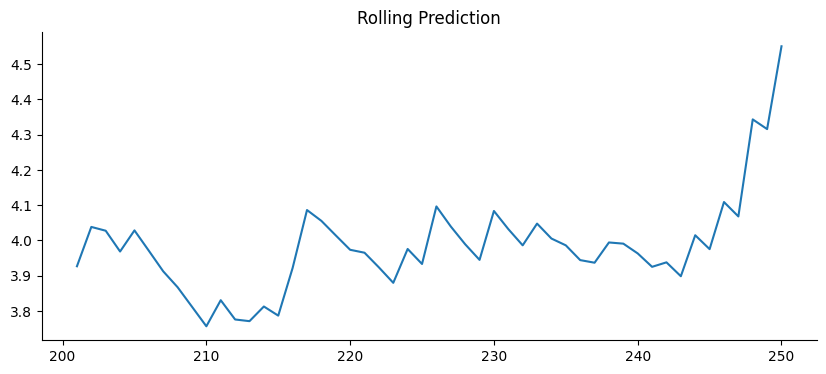

In [165]:
rolling_predictions = []
test_size = 50

for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1) #could the horizen be the number of periods we want to FC
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-50:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

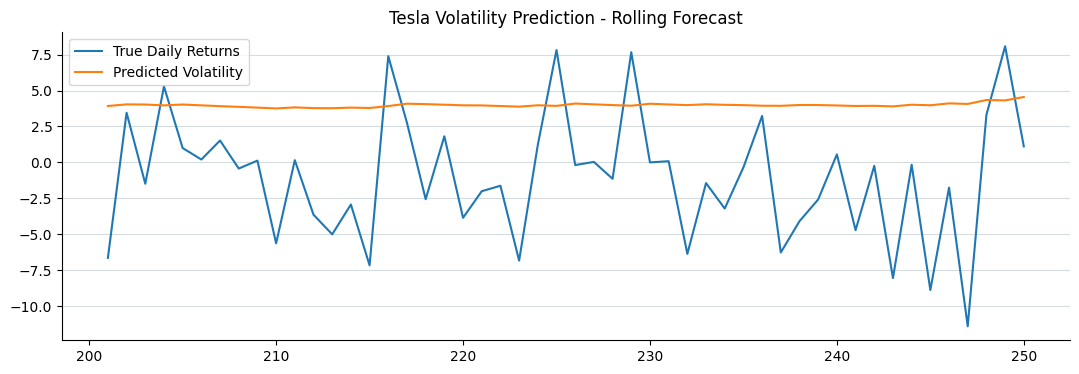

In [166]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'][-50:])
plt.plot(rolling_predictions)
plt.title('Tesla Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

# [NOT USED] Fitting the rolling prediction model and relevant statistics

In [167]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output,Return,dummy,reg_output_squared,Multiplication_dummy
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,2022-01-04,1.641242e+09,-0.101193,-4.183270,1,0.010240,0.010240
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,2022-01-05,1.641334e+09,-0.218186,-5.347121,1,0.047605,0.047605
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,2022-01-06,1.641426e+09,-0.204311,-2.152337,1,0.041743,0.041743
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,2022-01-07,1.641517e+09,-0.248822,-3.544657,1,0.061912,0.061912
5,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000,2022-01-10,1.641773e+09,-0.058042,3.034195,1,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171,-1.755083,1,0.000103,0.000103
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060,-11.408854,0,0.000101,0.000000
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069,3.308892,1,0.012115,0.012115
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799,8.082691,0,0.000282,0.000000


In [168]:
# Define the GARCH(1,1) model with an exogenous variable in the volatility equation
model = arch_model(df['Return'], p=1, q=1, x=df[['reg_output_squared']], vol='Garch', dist='Normal')


In [169]:
# Fit the model
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 952.9529347862035
Iteration:      2,   Func. Count:     14,   Neg. LLF: 765.3082607649947
Iteration:      3,   Func. Count:     21,   Neg. LLF: 722.9141945704214
Iteration:      4,   Func. Count:     28,   Neg. LLF: 707.6450386687146
Iteration:      5,   Func. Count:     33,   Neg. LLF: 707.550476323013
Iteration:      6,   Func. Count:     38,   Neg. LLF: 707.6023883913815
Iteration:      7,   Func. Count:     44,   Neg. LLF: 707.5383633420488
Iteration:      8,   Func. Count:     50,   Neg. LLF: 707.5307953998976
Iteration:      9,   Func. Count:     55,   Neg. LLF: 707.5307950344969
Iteration:     10,   Func. Count:     61,   Neg. LLF: 707.5307917303228
Optimization terminated successfully    (Exit mode 0)
            Current function value: 707.5307917303228
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


In [170]:
# Print model summary
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -707.531
Distribution:                  Normal   AIC:                           1423.06
Method:            Maximum Likelihood   BIC:                           1437.15
                                        No. Observations:                  250
Date:                Wed, Mar 22 2023   Df Residuals:                      249
Time:                        17:25:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3648      0.266     -1.373      0.170 [ -0.886,  0.15

# Statistical Tests | PART II.

#### Ljung-Box Test on the residuals

In [171]:
# H0: The residuals are independently distributed
# H1: The residuals are not independently distributed; they exhibit serial correlation

sm.stats.acorr_ljungbox(gm_resid, lags=[25], return_df=True)

# p-value is less than 0.5, therefore the residuals exhibit serial correlation
# The GARCH(1,1) model is designed to capture the conditional heteroskedasticity 
#   in the df, and assuming that the model is correctly specified, the residuals 
#       should be independent and identically distributed. Any significant serial 
#           correlation in the residuals suggests that the model is not fully capturing 
#               the conditional heteroskedasticity or other patterns in the df

#NOTE: maybe we can try to adjust the number of lags

NameError: name 'gm_resid' is not defined

#### Jarque-Bera Test on the residuals / Test for normality in the residuals

In [ ]:
# H0: The residuals follows a normal distribution
# H1: The residuals does not follow a normal distribution

stats.jarque_bera(gm_resid)

# same as doing the tests for the returns (???)